Université Sultan Moulay Slimane <img src="materials/ensa_logo.png" alt="usms logo" style="width:38px; float: right;
    margin-left: 0.625em;" />
    <br><br>
École Nationale des Sciences Appliquées de Khouribga <img src="materials/ensa_logo.png" alt="ensakh logo" style="width:60px; float: right;
    margin-left: 0.625em;" />

---

# TP - DATA CLEANING
> ## HOUSING AND SALARY DATASETS

- Realisé par :<br> 
  - AISSY Achraf <br>
  - EL FATHI Zakaria <br>
  - ZARHLOUL Yasser <br>
  - CHERKAOUI Kamal <br>
  
 
- Encadré par : 
  - Pr. OURDOU Amal <BR>
<h6>IID2, ENSA de Khouribga, AU : 2022/2023</h6>


---

In [48]:
# Loading the required packages and libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression


## 1. Loading the data

In [49]:
### Load the Database to a pandas dataframe
df_salary = pd.read_csv('./datasets/salary.csv')
df_housing = pd.read_csv('./datasets/new_housing.csv')

## 2. Exploring the data

In [50]:
df_housing.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,ratio_bedroom_to_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [51]:
df_salary.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [52]:
df_housing.shape

(20640, 14)

In [53]:
df_salary.shape

(742, 42)

In [54]:
# Checking the null values
df_housing.isnull().sum()

Unnamed: 0                    0
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
ratio_bedroom_to_room       207
population_per_household      0
dtype: int64

In [55]:
# Checking the null values
df_salary.isnull().sum()

index                 0
Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree          

## 3. Locate the missing values 

<AxesSubplot: >

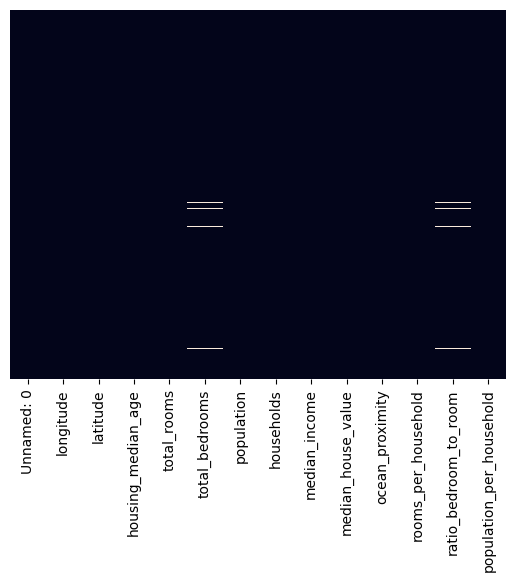

In [56]:
# heatmap for visualizing the null vaues
sns.heatmap(df_housing.isnull(), yticklabels = False,cbar = False)

<AxesSubplot: >

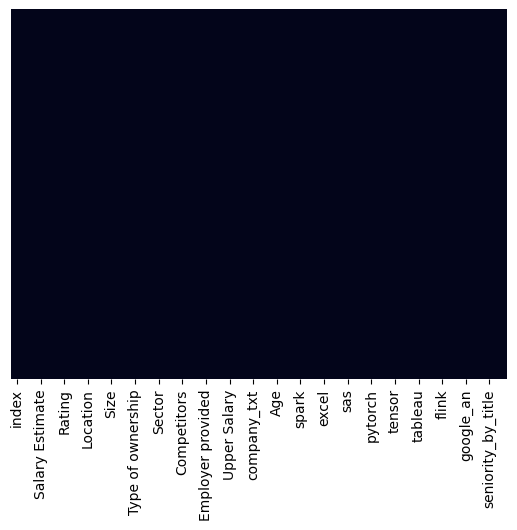

In [57]:
# heatmap for visualizing the null vaues
sns.heatmap(df_salary.isnull(), yticklabels = False,cbar = False)

In [58]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                20640 non-null  int64  
 1   longitude                 20640 non-null  float64
 2   latitude                  20640 non-null  float64
 3   housing_median_age        20640 non-null  float64
 4   total_rooms               20640 non-null  float64
 5   total_bedrooms            20433 non-null  float64
 6   population                20640 non-null  float64
 7   households                20640 non-null  float64
 8   median_income             20640 non-null  float64
 9   median_house_value        20640 non-null  float64
 10  ocean_proximity           20640 non-null  object 
 11  rooms_per_household       20640 non-null  float64
 12  ratio_bedroom_to_room     20433 non-null  float64
 13  population_per_household  20640 non-null  float64
dtypes: flo

In [59]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

## 3. Data cleaning

### Dropping Irrelevant Data

In [60]:
df_housing = df_housing.drop(df_housing.columns[0], axis=1)
df_housing = df_housing.drop(columns=['longitude','latitude'])


###         Missing value handling

Filling the missing value we need to see the test and train data simultaneously.     
We will be replacing the null values with mode for categorical values and mean for continous values.    
We will delete columns with more than 50% null values as the available information add no value for our model.    

In [61]:
df_housing['total_bedrooms'] = df_housing['total_bedrooms'].fillna(df_housing['total_bedrooms'].mode()[0]) # replacing with mode

In [62]:
df_housing['ratio_bedroom_to_room'] = df_housing['ratio_bedroom_to_room'].fillna(df_housing['ratio_bedroom_to_room'].mean()) # replacing with mean for train


In [63]:
# Checking the null values
df_housing.isnull().sum()

housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
ratio_bedroom_to_room       0
population_per_household    0
dtype: int64

In [64]:
# Checking the null values
df_salary.isnull().sum().sum()

0

great! this dataframe does not contain any other missing value

In [65]:
#the value in the index 19890 was null,we check it using the two columns total_bedrooms and ratio_bedroom_to_room
print(df_housing['total_bedrooms'][19890])
print(df_housing['ratio_bedroom_to_room'][19890])

280.0
0.2130388304808513


✔ we just done filling the missing values of 'total_bedrooms' and 'ratio_bedroom_to_room' with the approprites values

---
Salary Estimates's rows general shapes :<br>
- "Employer Provided Salary: $XX-YY per hour" <br>
  
- "Employer Provided Salary: $XX-YYK"<br>
- "$XX-YYK (Glassdoor est.)"<br>
- "$XX-YYK(Employer est.)"<br>

In [66]:

# Extract salary information
df_salary = df_salary['Salary Estimate'].str.split('-', expand=True)
df_salary.columns = ['min_salary', 'max_salary']
df_salary['min_salary'] = df_salary['min_salary'].str.replace('[^0-9]', '')
df_salary['max_salary'] = df_salary['max_salary'].str.replace('[^0-9]', '')

# Handle Employer Provided Salary values
df_salary['min_salary'] = df_salary.apply(lambda x: x['min_salary'][2:] if x['min_salary'][:2] == 'E:' else x['min_salary'], axis=1)
df_salary['max_salary'] = df_salary.apply(lambda x: x['max_salary'][2:] if x['max_salary'][:2] == 'E:' else x['max_salary'], axis=1)

# Handle non-numeric values in salary columns
df_salary['min_salary'] = pd.to_numeric(df_salary['min_salary'], errors='coerce')
df_salary['max_salary'] = pd.to_numeric(df_salary['max_salary'], errors='coerce')
df_salary['max_salary'].fillna(df_salary['min_salary'], inplace=True)

# Multiply salary values that are in thousands to actual salary values
df_salary['min_salary'] = df_salary['min_salary'].apply(lambda x: x*1000 if isinstance(x, int) and x < 100 else x)
df_salary['max_salary'] = df_salary['max_salary'].apply(lambda x: x*1000 if isinstance(x, int) and x < 100 else x)

# Convert salary columns to integers
df_salary['min_salary'] = pd.to_numeric(df_salary['min_salary'], errors='coerce')
df_salary['max_salary'] = pd.to_numeric(df_salary['max_salary'], errors='coerce')

df_salary['average_salary'] = (df_salary['min_salary']+df_salary['max_salary'])/2

df_salary['average_salary']

C:\Users\EliteBooK\AppData\Local\Temp\ipykernel_15672\3369450624.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_salary['min_salary'] = df_salary['min_salary'].str.replace('[^0-9]', '')
C:\Users\EliteBooK\AppData\Local\Temp\ipykernel_15672\3369450624.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_salary['max_salary'] = df_salary['max_salary'].str.replace('[^0-9]', '')


0      72000.0
1      31556.0
2      85000.0
3      76500.0
4      43071.5
        ...   
737    29055.5
738    36066.5
739    73500.0
740    47580.0
741    30563.0
Name: average_salary, Length: 742, dtype: float64

## 4. checking for more corrupted data

### Regression method

In [67]:
df_housing_2 = pd.read_csv('./datasets/new_housing.csv')
df_regression_housing = df_housing_2.copy()
df_regression_housing =  df_regression_housing.drop(columns=['ocean_proximity'])
df_regression_housing.isna().any()

Unnamed: 0                  False
longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms               True
population                  False
households                  False
median_income               False
median_house_value          False
rooms_per_household         False
ratio_bedroom_to_room        True
population_per_household    False
dtype: bool

In [68]:
# Splitting data to two dataframes
ratio_bedrom = df_regression_housing.loc[:, df_regression_housing.columns != 'total_bedrooms']
tot_bedrom = df_regression_housing.loc[:, df_regression_housing.columns != 'ratio_bedroom_to_room']

# split the ratio_bedroom_to_room table into training and test data
test_data = ratio_bedrom.loc[ratio_bedrom['ratio_bedroom_to_room'].isnull()]
ratio_bedrom = ratio_bedrom.dropna()

y_train = ratio_bedrom['ratio_bedroom_to_room']
X_train = ratio_bedrom.drop('ratio_bedroom_to_room', axis=1)

X_test = test_data.drop('ratio_bedroom_to_room', axis=1)

# Initializing our model
Lr_ratio = LinearRegression()
# Passing the training data
Lr_ratio.fit(X_train, y_train)

# making the predictions
y_pred = Lr_ratio.predict(X_test)
# and affecting the new predictions to the missing values 
df_regression_housing.loc[df_regression_housing.ratio_bedroom_to_room.isnull(), 'ratio_bedroom_to_room'] = y_pred

# repeating for total_bedrooms

test_data = tot_bedrom.loc[tot_bedrom['total_bedrooms'].isnull()]
tot_bedrom = tot_bedrom.dropna()

y_train = tot_bedrom['total_bedrooms']
X_train = tot_bedrom.drop('total_bedrooms', axis=1)

X_test = test_data.drop('total_bedrooms', axis=1)

Lr_tot = LinearRegression()
Lr_tot.fit(X_train, y_train)

y_pred = Lr_tot.predict(X_test)
df_regression_housing.loc[df_regression_housing.total_bedrooms.isnull(), 'total_bedrooms'] = y_pred

# final result
df_regression_housing


,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,ratio_bedroom_to_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209


check if there still any missing values

In [69]:
df_regression_housing.isnull().any().sum()

0

---
# Export files

In [70]:
df_salary.to_csv("Results/salary.csv")
df_housing.to_csv("Results/housing.csv")
df_regression_housing.to_csv("Results/housing-regression")